# Trabajo No.4
## Modelo 2
#### integrantes:Jose Foronda y Alexa Paternina

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('datosenergeticos.csv', sep=',')

In [5]:
# Definir los datos en conjunto de entrenamiento y prueba
X = df.drop('Type_of_Renewable_Energy', axis=1)
y = df['Type_of_Renewable_Energy']

In [6]:
# Reducir el tamaño del dataset
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Construir un pipeline para el modelo Random Forest
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

In [8]:
# Definir hiperparámetros para GridSearchCV
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20]
}

In [10]:
# Realizar búsqueda de hiperparámetros para Random Forest
rf_grid = GridSearchCV(rf_pipe, param_grid_rf, cv=3, error_score='raise')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [10, 20],
                         'rf__n_estimators': [100, 200]})

In [11]:
# Obtener los mejores hiperparámetros y el mejor modelo Random Forest
best_params_rf = rf_grid.best_params_
best_model_rf = rf_grid.best_estimator_

In [15]:
y_pred_rf = best_model_rf.predict(X_test)

In [16]:
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           1       0.15      0.22      0.18        59
           2       0.12      0.08      0.09        77
           3       0.13      0.14      0.13        59
           4       0.17      0.21      0.19        63
           5       0.19      0.32      0.23        57
           6       0.17      0.07      0.10        71
           7       0.10      0.08      0.09        64

    accuracy                           0.15       450
   macro avg       0.15      0.16      0.15       450
weighted avg       0.15      0.15      0.14       450



In [13]:
train_sizes_rf, train_scores_rf, valid_scores_rf = learning_curve(best_model_rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)

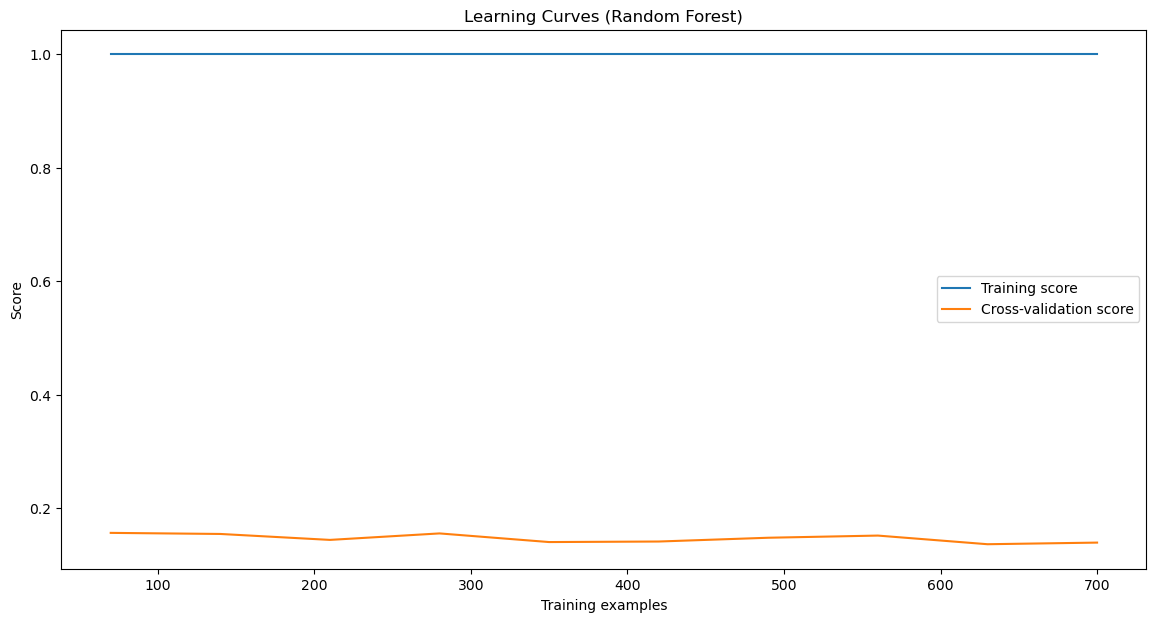

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training score')
plt.plot(train_sizes_rf, np.mean(valid_scores_rf, axis=1), label='Cross-validation score')
plt.title('Learning Curves (Random Forest)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()

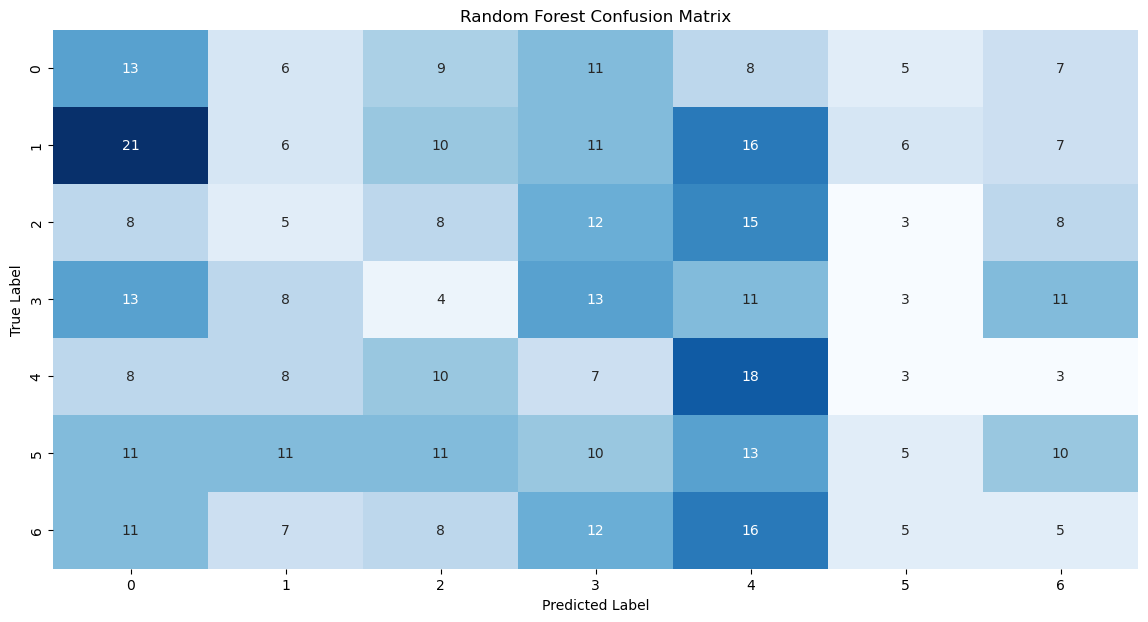

In [17]:
plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
